#### Description about Dataset

Economic Indicators, as the name suggests, is a dataset containing various economic parameters such as housing, employment, tourism etc. These indicators assist in the planning and development of a particular city. This dataset is published by the Department of Innovation and Technology and describes the parameters used for overall development of city of Boston. Each row of the dataset depicts a single entry containing the estimates of passenger counts, unemployment rate, house pricing, hotel occupancy rates etc. and is used by the Boston Planning and Redevelopment Authority for the economic development and growth planning. This dataset contains the information of 2 years starting from January 2013 till January 2015.

The Url for this dataset is https://data.boston.gov/dataset/c8b8ef8c-dd31-4e4e-bf19-af7e4e0d7f36/resource/29e74884-a777-4242-9fcc-c30aaaf3fb10/download/economic-indicators.csv
By this code, the dataset can be downloaded.

Following questions have been answered with the help of this dataset:-
1. How the count of foreclosure deeds changes with the change in the number of foreclosure petitions? (to be done through Linear Regression)
2. Is the count of international flights at Logan Airport dependent on the number count of passengers at Logan Airport? (done through visualization)
3. Does the unemployment rate and the labor force participation rate follow the same trend? (done through visualization)
4. Is the housing sales volumes dependent on the median housing sales price? (done through visualization)
5. Does the hotel occupancy rate increases with the increase in the number of passengers? (done through visualization)

In [213]:
## Extraction of dataset publicly available
import pandas as pd
import numpy as np
df = pd.read_csv('https://data.boston.gov/dataset/c8b8ef8c-dd31-4e4e-bf19-af7e4e0d7f36/resource/29e74884-a777-4242-9fcc-c30aaaf3fb10/download/economic-indicators.csv')

In [214]:
## Data clean up
to_drop = ['total_jobs', 'pipeline_unit', 'pipeline_total_dev_cost', 'pipeline_sqft', 'new_housing_const_permits', 'new-affordable_housing_permits']
df.drop(to_drop, inplace = True, axis=1)

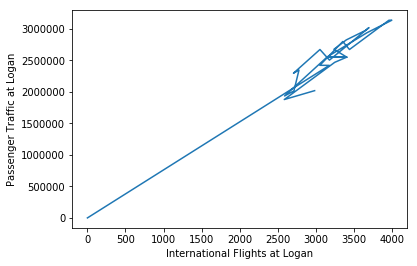

In [215]:
## Data Visualization
import matplotlib.pyplot as plt

# Is the count of international flights dependent on the number of passenger counts at Logan Airport?
x = df['logan_intl_flights'].tolist()
y = df['logan_passengers'].tolist()
plt.plot(x,y)
plt.xlabel("International Flights at Logan")
plt.ylabel("Passenger Traffic at Logan")
plt.show()

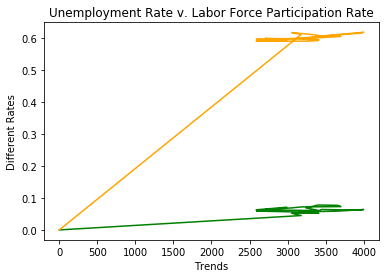

In [216]:
# Does the unemployment rate and the labor force participation rate follow the same trend?
y = df['unemp_rate'].tolist()
y1 = df['labor_force_part_rate'].tolist()
plt.plot(x, y, color='g')
plt.plot(x, y1, color='orange')
plt.xlabel('Trends')
plt.ylabel('Different Rates')
plt.title('Unemployment Rate v. Labor Force Participation Rate')
plt.show()

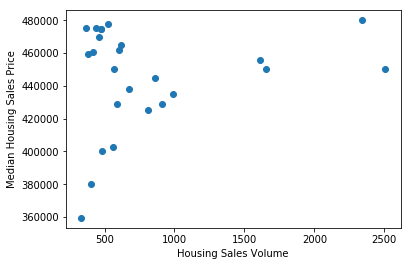

In [217]:
# Is the housing sales volumes dependent on the median housing sales price?
x = df['housing_sales_vol'].tolist()
y = df['med_housing_price'].tolist()
plt.scatter(x,y)
plt.xlabel("Housing Sales Volume")
plt.ylabel("Median Housing Sales Price")
plt.show()

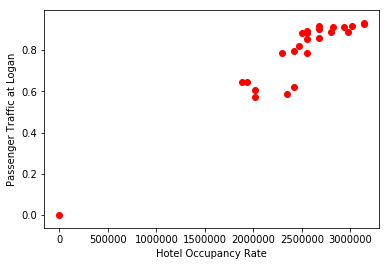

In [218]:
# Does the hotel occupancy rate increases with the increase in the number of passengers?
x = df['logan_passengers'].tolist()
y = df['hotel_occup_rate'].tolist()
plt.scatter(x,y, color ='r')
plt.xlabel("Hotel Occupancy Rate")
plt.ylabel("Passenger Traffic at Logan")
plt.show()

In [219]:
#Descriptive Analysis

df.describe(include = 'all')

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,unemp_rate,labor_force_part_rate,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol
count,25.000000,25.000000,2.500000e+01,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2013.560000,6.280000,2.455200e+06,3105.800000,0.77700,216.556570,0.060200,0.578560,1330.567385,24.880000,8.120000,444947.120000,802.800000
std,0.583095,3.623074,6.207854e+05,753.731274,0.20212,61.215923,0.014888,0.120829,1795.195784,12.474374,3.113412,31730.943582,594.514227
min,2013.000000,1.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,359500.000000,332.000000
25%,2013.000000,3.000000,2.345162e+06,2986.000000,0.64700,180.790000,0.056000,0.596000,348.000000,14.000000,6.000000,429000.000000,459.000000
50%,2014.000000,6.000000,2.551246e+06,3181.000000,0.85800,233.435374,0.062000,0.600000,485.000000,20.000000,8.000000,450000.000000,570.000000
75%,2014.000000,9.000000,2.799342e+06,3408.000000,0.90100,255.497825,0.069000,0.608000,1393.000000,34.000000,10.000000,470000.000000,864.000000
max,2015.000000,12.000000,3.137087e+06,4000.000000,0.93100,288.500000,0.078000,0.619000,7023.010000,50.000000,14.000000,480000.000000,2508.000000


In [220]:
##Predictive Analysis using stats model

#Linear Model
#foreclosure_deeds= β*foreclosure_pet + μ

import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('foreclosure_deeds ~ foreclosure_pet', data = df).fit()
print(results.params)
results.summary()

Intercept          6.845168
foreclosure_pet    0.051239
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      foreclosure_deeds   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.012
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.325
Time:                        14:42:06   Log-Likelihood:                -62.818
No. Observations:                  25   AIC:                             129.6
Df Residuals:                      23   BIC:                             132.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8452      1.412      4.848      0.000       3.924       9.766
foreclosure_pet     0.0512      0.051      1.006      0.325      -0.054       0.157
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.517
Skew:                          -0.157   Prob(JB):                        0.772
Kurtosis:                       2.370   Cond. No.                         62.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
model = smf.OLS.from_formula('foreclosure_deeds ~ foreclosure_pet', data = df)
results = model.fit()
print(results.params)

Intercept          6.845168
foreclosure_pet    0.051239
dtype: float64


Text(0.5,1,'Trend of forclosure deeds with foreclosure petitions')

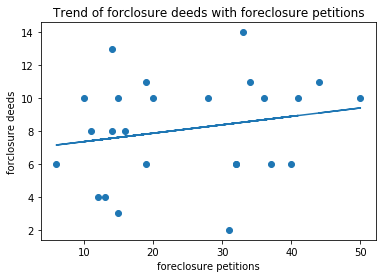

In [222]:
plt.scatter(df.foreclosure_pet, df.foreclosure_deeds)
plt.plot(df.foreclosure_pet, results.fittedvalues)
plt.xlabel('foreclosure petitions')
plt.ylabel('forclosure deeds')
plt.title('Trend of forclosure deeds with foreclosure petitions')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


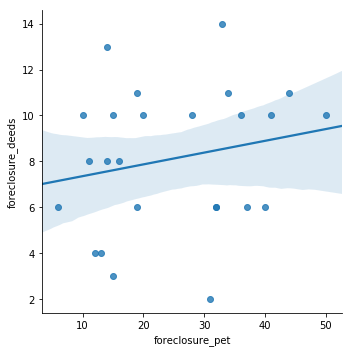

In [223]:
import seaborn as sns
sns.lmplot(x='foreclosure_pet', y='foreclosure_deeds', data=df)

In [224]:
from patsy import dmatrices
y,X = dmatrices('foreclosure_deeds ~ foreclosure_pet', data = df, return_type = 'dataframe')
print("X: type(x)")
print(X.columns)
model = smf.OLS(y, X)
result = model.fit()
result.summary()

X: type(x)
Index(['Intercept', 'foreclosure_pet'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      foreclosure_deeds   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.012
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.325
Time:                        14:42:19   Log-Likelihood:                -62.818
No. Observations:                  25   AIC:                             129.6
Df Residuals:                      23   BIC:                             132.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8452      1.412      4.848      0.000       3.924       9.766
foreclosure_pet     0.0512      0.051      1.006      0.325      -0.054       0.157
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.517
Skew:                          -0.157   Prob(JB):                        0.772
Kurtosis:                       2.370   Cond. No.                         62.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
##Machine Learning
y,X = dmatrices('foreclosure_deeds ~ foreclosure_pet', data = df)
print("y:{}".format(y.shape))
print("X:{}".format(X.shape))

y:(25, 1)
X:(25, 2)


In [226]:
X[0:10, :]

array([[ 1., 44.],
       [ 1., 50.],
       [ 1.,  6.],
       [ 1., 14.],
       [ 1., 12.],
       [ 1., 14.],
       [ 1., 19.],
       [ 1., 11.],
       [ 1., 19.],
       [ 1., 15.]])

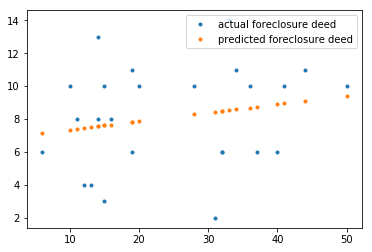

In [227]:
# Machine learning using scikit learn
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=False)
result = model.fit(X,y)

plt.plot(X[:,1], y, '.')
plt.plot(X[:,1], model.predict(X), '.')
plt.legend(['actual foreclosure deed', 'predicted foreclosure deed'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


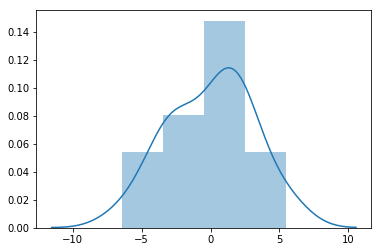

In [228]:
sns.distplot(y - model.predict(X))

In [229]:
model.coef_

array([[6.84516848, 0.05123921]])

#### Analysis Report

The current dataset contains the information related to various economic indicators which have been used for the planning and development of Boston. With the help of visualization, a few questions have been answered. On the basis of analysis, it can be concluded that the count of international flights at Logan Airport is not directly dependent on the number count of passengers at Logan Airport. There may be certain other factors determining the count of international flights such as weather conditions, demand and pricing etc. The graph doesnot directly show the trend or relationship. However, it can be one of the factors contributing to the count of international flights.

The unemployment rate and the labor force participation rate follow the same trend as depicted in the line plot. Also on the basis of descriptive analysis or descriptive statistics, it can be seen that the mean, standard deviation, minimum and maximum values are somewhat similar indicating the similarilty in the trend of the two rates. 
The housing sales volumes is dependent on the median housing sales price as the price is one of the main attribute for the increase or decrease in demand. As per the visualization, there is no specific trend or relationship between the pricing of the house and the sales volume but on careful analysis, it can seen that initially with the increase in price, there has been an increase in the sales volume but later on, they started following an inverse relationship, in the sense that with the increase in price, the sales volume starts declining. However, there are various other factors determining the sales volume, price cannot be considered as the sole factor contributing to the change in sales volume. 
The hotel occupancy rate increases with the increase in the number of passengers as the scatter plot somewhat shows the trends which is inclined towards the right side. All the scatter dots are forming linear regression line.

The main objective of the descriptive analysis is to give description about the data which is already existing. It helps in analyzing the trends and the relationship between various columns of the dataset. The descriptive statistics give the minimum value, maximum value, mean value, percentile value etc. of the dataset allowing to reach to the conclusion with respect to the given dataset. However, this is not the case with the Predictive analysis as one can reach to the conclusion beyond or outside the dataset.

In the assignment, the linear regression is done with two ways, one is through Predictive analysis, the other is done with the help of machine kearning through scikit kearn. In predictive analysis, there are various ways to perform Ordinary Least Squares, one is directly putting the value i.e. setting ols in the formula and data, the other way is to use the specific api, fitting and using the model. Scatter graphs of the same have been made. In the linear model we are trying to predict a continuous variable, and here the continuous variablw is foreclosure deed.

Model training process can be optimised by many ways. With the help of machine learning, one can predict the responses or the columns on the basis previous data. In other words, machine learning refers to the prediction of the data on the basis of the previous data. Such predicted data is arranged in form of the columns which were not present initially in the form of dataset. In this case, we are trying to predict the response variable which is foreclosure deed for the new/unknown values of foreclosure petitions which acts as features. Here, we are trying to build a linear model to make the predictions. It can be observed that the predicted foreclosure deeds are somewhat in a line depicting linear regression while the actual forseclosure deeds are somewhat scattered. The deeds increases with the increase in foreclosure petitions. The last graph depicts the difference between actual deeds and predicted deeds. The parameters i.e. linear coefficients are somewhat similar to the ones in Stats Model. However, the stats model is restricted to regressors that are statistically sound but sklearn is not bound in such a manner. It is because of this reason, the accuracy of regression increases/improves with sklearn.